<a href="https://www.kaggle.com/code/hossamahmedsalah/logistic-regression-msp?scriptVersionId=142135042" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# You can view other sessions via 
[GitHub - hossamAhmedSalah/Machine_Learning_MSP: MSP 23 workshop of machine learning](https://github.com/hossamAhmedSalah/Machine_Learning_MSP/tree/main)
![MSP Logo](https://github.com/hossamAhmedSalah/Machine_Learning_MSP/blob/main/Assets/image-removebg-preview.png?raw=true)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification

71


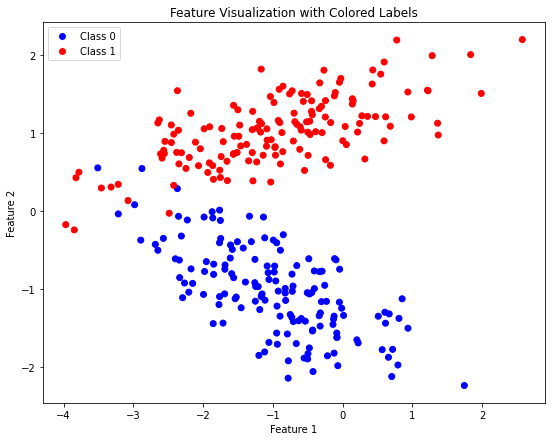

In [87]:
# 📝 you can try
# L =[3,8,11,29,31,33,45,48,61,64,69,71,76,87]
L = [71]

for i in L:
    # Set a fixed random seed for reproducibility
    print(i)
    np.random.seed(i)

    # Generate data for classification
    X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)


   
    # Create a scatter plot
    plt.figure(figsize=(9,7))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o')

    # Add labels and legend
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Feature Visualization with Colored Labels')
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=8, label='Class 0'),
                        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=8, label='Class 1')])

    # Display the plot
    plt.show()


# Building the Logistic Regression
1. Line 
2. Logistic of the Line

In [71]:
from sklearn.linear_model import LinearRegression


In [72]:
# model 
LR = LinearRegression()
# fitting the model
LR.fit(X, y)

LinearRegression()

In [73]:
LR.coef_

array([9.55106202e-05, 3.91713700e-01])

In [74]:
LR.intercept_

0.4970131666271372

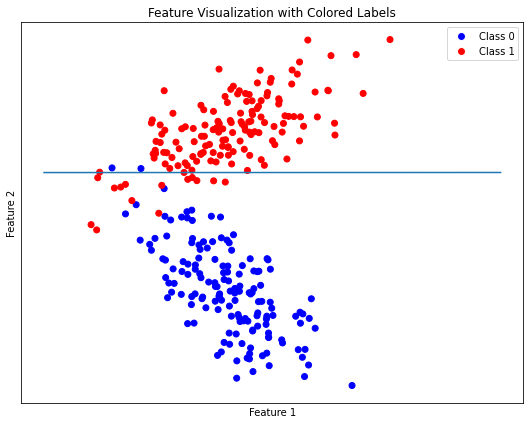

In [98]:
# Extract coefficients and intercept
coef = LR.coef_[0]
intercept = LR.intercept_

# create the line
x_axis = np.linspace(-5, 5, 300)
# the line 
LRLine = x_axis*coef + intercept
# Create a scatter plot
plt.figure(figsize=(9,7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o')
plt.plot(x_axis, LRLine, label='LR')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature Visualization with Colored Labels')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=8, label='Class 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=8, label='Class 1')])
# Turn off ticks on both x and y axes
plt.xticks([])
plt.yticks([])

# Display the plot
plt.show()

In [99]:
# implementing the Logistic function
def logistic(x):
    return np.exp(x)/ (np.exp(x)+1)

In [153]:
# for these x features we have a true 
print(X[10], y[10])

[-0.5916897   1.04022624] 1


In [154]:
# Make predictions using LR 
prediction = model.predict([[-0.5916897  , 1.04022624]])
prediction


array([1])

In [155]:
# logistic 
logistic(prediction)

array([0.73105858])

# Implementing the logistic regression

In [158]:
class LogisticRegression:
    def __init__(self):
        self.linear_reg = LinearRegression()

    def fit(self, X, y):
        self.linear_reg.fit(X, y)

    def predict(self, X):
        linear_prediction = self.linear_reg.predict(X)
        logistic_prediction = logistic(linear_prediction)  # Applying the sigmoid function
        return np.round(logistic_prediction)  # Round to binary labels (0 or 1)


In [160]:
# let's try to see out model 
LogReg = LogisticRegression()
# fitting thr model
LogReg.fit(X, y)
# predicting
y_pred = LogReg.predict(X)


In [162]:
d = {
    'y_true' : y,
    'y_pred' : y_pred
}
trueVsPred = pd.DataFrame(d)
trueVsPred

,y_true,y_pred
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
295,1,1
296,1,1
297,1,1
298,1,1


In [165]:
# Count the number of wrong predictions
wrong_predictions = trueVsPred[trueVsPred['y_true'] != trueVsPred['y_pred']]
wrong_predictions


,y_true,y_pred
7,1,0
23,0,1
70,1,0


In [169]:
num_wrong = len(wrong_predictions)
print(f"{(num_wrong/300)*100} % classified wrong")

1.0 % classified wrong


# SKLearn Logisitic Regression

In [170]:
from sklearn.linear_model import LogisticRegression


In [173]:
logR = LogisticRegression()
# fitting the model
logR.fit(X, y)
# model predict
y_pred = logR.predict(X)
# model acc
logR.score(X, y)

0.99

# Model Complexity

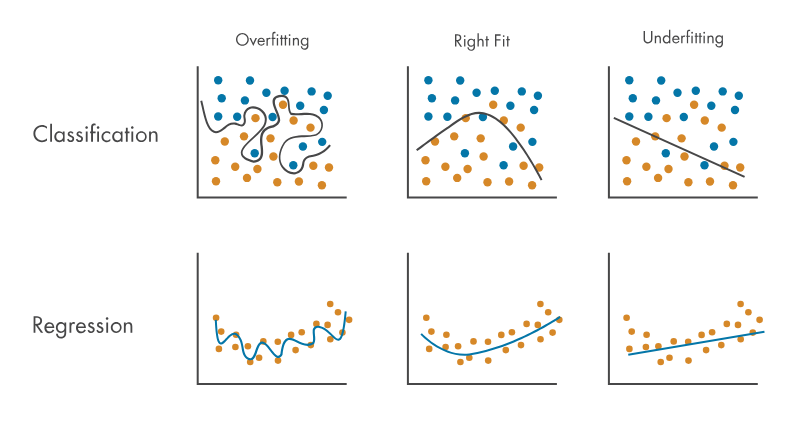

# Regulization

> Adding penalty to the complex model 
> in other words we consider the model with higher complexity have more errors 
> How🤔 ? you may ask as the overfitted models preform very well in the training 
> simply let's add the complexity to the error 


## L1 Regulization
simple model

> $3X_1 + 4X_2 +5 = 0$
> 

Error  + complexity 

Error  +  L1

$L1 = |3|+|4|=7$

Error + 7

---

complex model

> $2X^3_1- 2X^2_1X_2-4X^3_2+3X_1^2+6X_1X_2+4X_2^2+5=0$
> 

Error  + L1

$L1 = |2|+|2|+|-4|+|3|+|6|+|4| =21$

Error + 21

---

⚒️ okay we need a factor to control how much of this punishment we would apply in fact

$Error + \red\lambda ~ L1$

if $\red\lambda == 1$:

we would apply the whole punishment which mean punish the complex model to the death☠️ 

we won’t tolerant any complex radical models😡

else :

we can accept a more complex model by punishing it less

# L2 Regulization
> just square the coef. and sum them, every thing else apply

In [177]:
LogisticRegression?
# C (for logistic regression) control the regularization strength

Init signature:

LogisticRegression(

    penalty='l2',

    *,

    dual=False,

    tol=0.0001,

    C=1.0,

    fit_intercept=True,

    intercept_scaling=1,

    class_weight=None,

    random_state=None,

    solver='lbfgs',

    max_iter=100,

    multi_class='auto',

    verbose=0,

    warm_start=False,

    n_jobs=None,

    l1_ratio=None,

)

Docstring:     

Logistic Regression (aka logit, MaxEnt) classifier.



In the multiclass case, the training algorithm uses the one-vs-rest (OvR)

scheme if the 'multi_class' option is set to 'ovr', and uses the

cross-entropy loss if the 'multi_class' option is set to 'multinomial'.

(Currently the 'multinomial' option is supported only by the 'lbfgs',

'sag', 'saga' and 'newton-cg' solvers.)



This class implements regularized logistic regression using the

'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note

that regularization is applied by default**. It can handle both dense

and sparse input. Use C-ordered 

### by the way the solver

`liblinear`: This is a versatile solver that is suitable for both small and large datasets. It's often used for logistic regression and linear support vector machines (SVMs). It's a good default choice for many cases.

`lbfgs`: Limited-memory Broyden–Fletcher–Goldfarb–Shanno (L-BFGS) is an optimization algorithm that is particularly efficient for problems with a large number of features. It's often a good choice when working with medium-sized datasets.

`newton-cg`🌟: This is another optimization algorithm based on Newton's method. It's well-suited for problems with a small number of samples and a large number of features.

`sag` and `saga`: Stochastic Average Gradient (SAG) and its improved version, SAGA, are solvers that are designed to handle large datasets efficiently. They are particularly useful when working with large-scale datasets.

> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
